# Plotting and analyzing data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import os
# os.chdir("/home/jack/mtpData/tcp-dumbbell/")
# os.listdir()

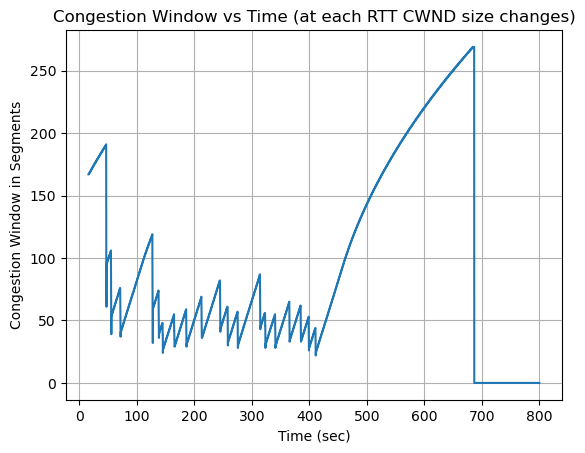

In [15]:
# data = readlines("n0.dat")
filename = 'dumbbell-2.cwnd'
with open(filename) as f:
    data = f.readlines();
time=[]
val =[]
for i in data:
    i = i.split(' ')
    time.append(float(i[0].strip()))
    val.append(int(i[1].strip()))
plt.plot(time, val)
# data
plt.xlabel("Time (sec)")
plt.ylabel("Congestion Window in Segments")
plt.title("Congestion Window vs Time (at each RTT CWND size changes)")
plt.grid()

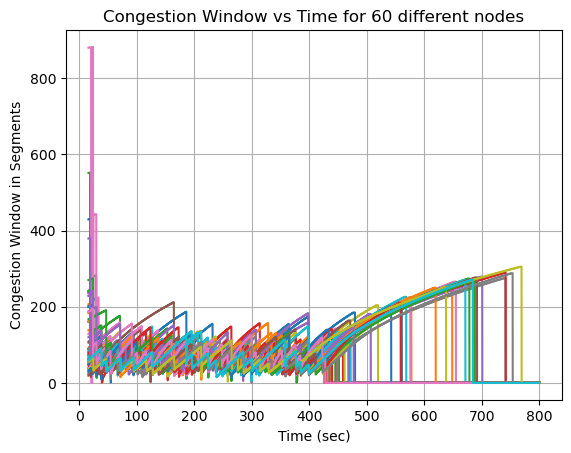

In [16]:
# filename = "dumbbell-8.cwnd"
t = np.array([0.0])
v = np.array([0])
ep = 0.1
for f in os.listdir():
    if(f.endswith('.cwnd')):
        with open(f) as fn:
            data = fn.readlines();
        time=[]
        val =[]
        for i in data:
            i = i.split(' ')
            time.append(float(i[0].strip()))
            val.append(int(i[1].strip()))
        time = np.array(time)
        val = np.array(val)
        plt.plot(time, val)
plt.xlabel("Time (sec)")
plt.ylabel("Congestion Window in Segments")
plt.title("Congestion Window vs Time for 60 different nodes")
plt.grid()

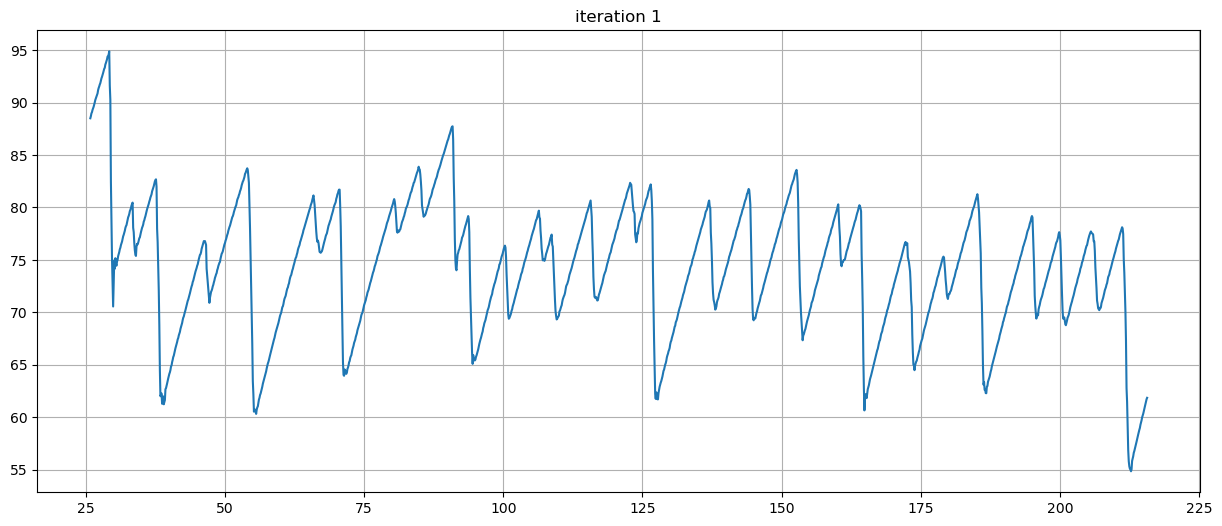

In [23]:
allVals = defaultdict(int)

for cnt in range(2, 62):    
    filename = f"dumbbell-{cnt}.cwnd"
    with open(filename) as f:
        data = f.readlines()

    dick = {}
    for i in data:
        i = i.split(' ')
        t = float(i[0].strip())
        v = int(i[1].strip())
        # if(t<=200 or t>=250): continue
        allVals[t] += v
    f.close()




x = list(allVals.keys())
x.sort()
y = []
for i in x:
    y.append(allVals[i]/60)


plt.figure(figsize=(15,6))
plt.plot(x[100:2000], y[100:2000])
plt.title("iteration 1")
plt.grid()

# Analysing Flow Monitor XML file

In [7]:
import xml.etree.ElementTree as ET

In [11]:
tree = ET.parse('dumbbell-flowmonitor.xml')
root = tree.getroot()
for child in root:
    print(child.tag, child.attrib)
flowstats = root[0]
attri = []
for flows in flowstats:
    attri.append(flows.attrib)

FlowStats {}
Ipv4FlowClassifier {}
Ipv6FlowClassifier {}
FlowProbes {}


In [12]:
def calculate_throughput(flow_data):
    throughput_data = []
    for flow in flow_data:
        tx_bytes = int(flow['txBytes'])  # Transmitted bytes
        time_first_tx_ns = float(flow['timeFirstTxPacket'].replace('+', '').replace('ns', ''))  # First transmission time (ns)
        time_last_tx_ns = float(flow['timeLastTxPacket'].replace('+', '').replace('ns', ''))  # Last transmission time (ns)
        # Calculate total time in seconds
        total_time_sec = (time_last_tx_ns - time_first_tx_ns) / 1e9

        # Calculate throughput in Mbps
        throughput_bps = tx_bytes / total_time_sec
        throughput_mbps = (throughput_bps * 8) / 1e6

        throughput_data.append({'flowId': flow['flowId'], 'throughput_mbps': throughput_mbps})

    return throughput_data

In [13]:
throughputPerFlow = calculate_throughput(attri)
throughputPerFlow

[{'flowId': '1', 'throughput_mbps': 1.226042110984801},
 {'flowId': '2', 'throughput_mbps': 1.6668796239096515},
 {'flowId': '3', 'throughput_mbps': 1.848222508169176},
 {'flowId': '4', 'throughput_mbps': 0.03485601970447879},
 {'flowId': '5', 'throughput_mbps': 0.038485815269942124},
 {'flowId': '6', 'throughput_mbps': 0.02613977869127223},
 {'flowId': '7', 'throughput_mbps': 1.9314930899120253},
 {'flowId': '8', 'throughput_mbps': 1.8848842666489654},
 {'flowId': '9', 'throughput_mbps': 0.039538994967487355},
 {'flowId': '10', 'throughput_mbps': 1.253764451463527},
 {'flowId': '11', 'throughput_mbps': 1.9954456854176703},
 {'flowId': '12', 'throughput_mbps': 0.03723472620683408},
 {'flowId': '13', 'throughput_mbps': 0.04023163411817398},
 {'flowId': '14', 'throughput_mbps': 1.5061959300807333},
 {'flowId': '15', 'throughput_mbps': 1.1371141969191358},
 {'flowId': '16', 'throughput_mbps': 1.4843251360211365},
 {'flowId': '17', 'throughput_mbps': 0.03057969399829786},
 {'flowId': '18',

## Analsing loss synchronization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import os
os.chdir("tcp-dumbbell")


### metric 1: pairwise

In [2]:
# calculating s
filename = 'dumbbell-2.cwnd'
with open(filename) as f:
    data = f.readlines();


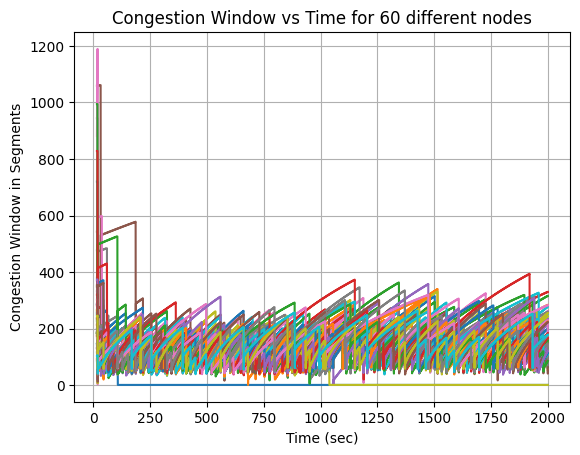

In [3]:
# filename = "dumbbell-8.cwnd"
t = np.array([0.0])
v = np.array([0])
ep = 0.1
for f in os.listdir():
    if(f.endswith('.cwnd')):
        with open(f) as fn:
            data = fn.readlines();
        time=[]
        val =[]
        for i in data:
            i = i.split(' ')
            time.append(float(i[0].strip()))
            val.append(int(i[1].strip()))
        time = np.array(time)
        val = np.array(val)
        plt.plot(time, val)
plt.xlabel("Time (sec)")
plt.ylabel("Congestion Window in Segments")
plt.title("Congestion Window vs Time for 60 different nodes")
plt.grid()

In [4]:
# reading files
data_d2 = np.genfromtxt("dumbbell-2.cwnd", delimiter=8).reshape(-1, 2)
data_d3 = np.genfromtxt("dumbbell-4.cwnd", delimiter=8).reshape(-1, 2)
file_names=['dumbbell-2.cwnd', 'dumbbell-4.cwnd']
# data_d2 = data_d2[9843:]
# data_d3 = data_d3[9843:]
# preprocessing data
# data_d2 = data_d2[np.any(data_d2 > 200, axis=1), :]
# data_d3 = data_d3[np.any(data_d3 > 200, axis=1), :]

In [5]:
for i in range(0, 20000):
    if(data_d3[i][0] > 1500):
        print(i)
        break

14843


In [6]:
data_d2_val = data_d2[:, 1]
data_d3_val = data_d3[:, 1]

# min-max normalization
data_d2_val = (data_d2_val - np.min(data_d2_val)) / (np.max(data_d2_val) - np.min(data_d2_val))
data_d3_val = (data_d3_val - np.min(data_d3_val)) / (np.max(data_d3_val) - np.min(data_d3_val))

In [7]:
print(len(data_d3) == len(data_d3))
print(len(data_d3))

True
19843


In [8]:
# length of d2 and d3 are equal

sz = len(data_d2)
# hold loss events
loss_d2 = np.zeros(sz)
loss_d3 = np.zeros(sz)

for i in range(1, sz-1):
    if(data_d2[i][1] < data_d2[i-1][1]):
        # print("loss d2")
        loss_d2[i] = 1
    if(data_d3[i][1] < data_d3[i-1][1]):
        # print("loss d3")
        loss_d3[i] = 1

In [9]:
# two arrays determining loss events
s_d2_d3 = np.zeros(len(data_d2))

total = sz-1
# window length = sampling interval * tau
tau = 25
# s_ij = max(n_ij/n_i, n_ji/n_j)

# sliding window
for i in range(tau, total-tau):
    ni = 0
    nj = 0
    nij = 0
    for j in range(i-tau, i+tau):
        if(loss_d2[j] == 0 and loss_d3[j] == 0):
            continue
        if(loss_d2[j] == 1 and loss_d3[j] == 1):
            nij += 1
            ni += 1
            nj += 1
        elif(loss_d2[j] == 1 and loss_d3[j] != 1):
            ni += 1
        elif(loss_d3[j] == 1 and loss_d2[j] != 1):
            nj += 1
    if(ni != 0 and nj != 0):
        s_d2_d3[i] = max(nij/ni, nij/nj)
    elif(ni == 0 and nj != 0):
        s_d2_d3[i] = nij/nj
    elif(ni != 0 and nj == 0):
        s_d2_d3[i] = nij/ni

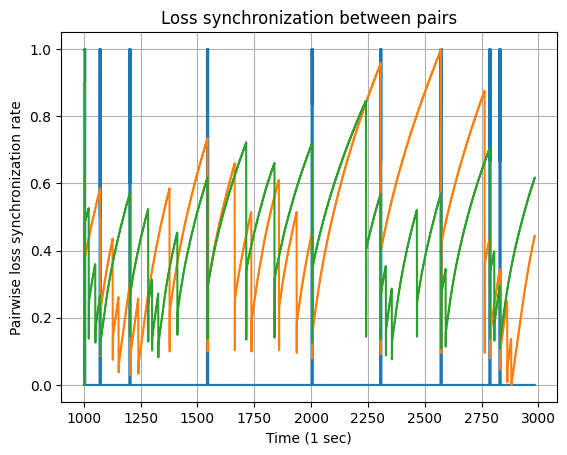

In [64]:
t = np.arange(sz)*0.1 + 1000
plt.plot(t, s_d2_d3, label="sync rate")
plt.plot(t, data_d2_val, label="c1")
plt.plot(t, data_d3_val, label="c2")
plt.xlabel("Time (1 sec)")
plt.ylabel("Pairwise loss synchronization rate")
plt.title("Loss synchronization between pairs")
plt.grid()
# plt.legend()

## heatmap

In [11]:
os.chdir('/home/jack/github/mtp/pythonWork')


In [12]:
data = np.load("pairwise_sync_rate_1000_to_2000.npy")

In [13]:
import seaborn as sns
# sns.set_theme(style="white", palette="pastel")

In [14]:
data[702]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(60, 60))

In [15]:
# np.linalg.norm(data)
l = []
for mat in data:
    mat_norm = np.linalg.norm(mat)
    # print(mat.shape)
    # print(mat_norm)
    l.append(mat_norm)

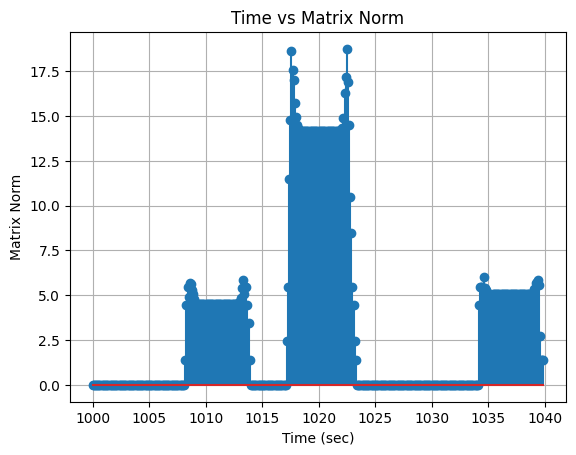

In [24]:
plt.stem(1000+np.arange(400)*0.1,l[0:400])
plt.xlabel("Time (sec)")
plt.ylabel("Matrix Norm")
plt.title("Time vs Matrix Norm")
plt.grid()
# plt.stem(l)


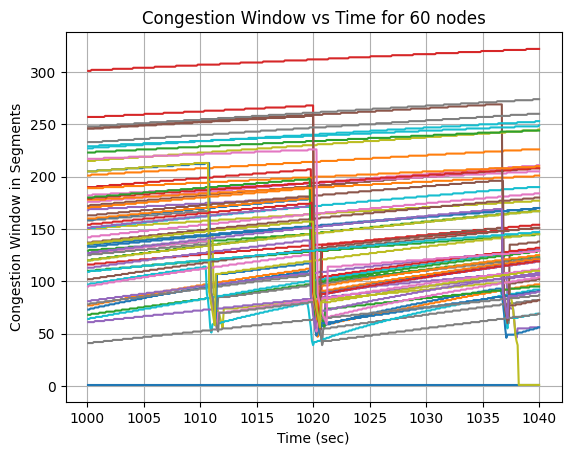

In [69]:
os.chdir('/home/jack/github/mtp/pythonWork/tcp-dumbbell/')
# 0 to 20000 sec, setm plot is from 1000 to 2000s
t = np.array([0.0])
v = np.array([0])
ep = 0.1
for f in os.listdir():
    # if(f.endswith('.cwnd') and f in ["dumbbell-2.cwnd","dumbbell-4.cwnd"]):
    if(f.endswith('.cwnd')):
        d = np.genfromtxt(f, delimiter=8).reshape(-1, 2)
        # print() 19843 2000s 9843 -> 1000s 
        plt.plot(d[9843:10243, 0], d[9843:10243, 1], label=f"{f}")
plt.xlabel("Time (sec)")
plt.ylabel("Congestion Window in Segments")
plt.title("Congestion Window vs Time for 60 nodes")
plt.grid()

In [18]:
# for i in range(len(data)):
#     pt = sns.heatmap(data[i])
#     f = pt.get_figure()
#     f.savefig(f"images/{i}.png")
#     f.clf()
#     print(f"images/{i}.png")

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import numpy as np

video_name = "heatmap_video_present.avi"

# Create a figure and axis
fig, ax = plt.subplots()
width, height = fig.canvas.get_width_height()

# Define video writer
video = cv2.VideoWriter(video_name, cv2.VideoWriter_fourcc(*'XVID'), 8, (width, height))

for i in range(401):
    ax.clear()  # Clear previous heatmap
    ax.set_xticks([])  # Remove x-ticks for a cleaner image
    ax.set_yticks([])  # Remove y-ticks for a cleaner image
    sns.heatmap(data[i], ax=ax, cbar=False)  # Redraw new heatmap
    
    # Draw and convert to OpenCV format
    fig.canvas.draw()
    img = np.array(fig.canvas.renderer.buffer_rgba())
    img_bgr = cv2.cvtColor(img, cv2.COLOR_RGBA2BGR)

    # Write frame to video
    video.write(img_bgr)

# Cleanup
video.release()
plt.close(fig)
cv2.destroyAllWindows()


ValueError: not enough values to unpack (expected 3, got 2)

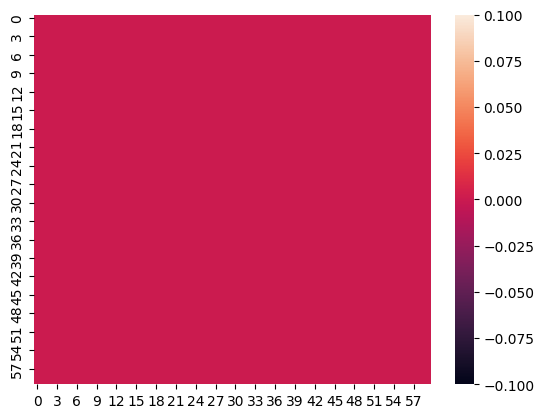

In [20]:
pt = sns.heatmap(data[0])
f = pt.get_figure()
frame = f
height, width, layers = frame.shape

video = cv2.VideoWriter(video_name, 0, 2, (width,height))

for i in range(len(data)):
    pt = sns.heatmap(data[i])
    f = pt.get_figure()
    # f.savefig(f"images/{i}.png")
    f.clf()
    video.write(cv2.imread(f))

cv2.destroyAllWindows()
video.release()

<Axes: >

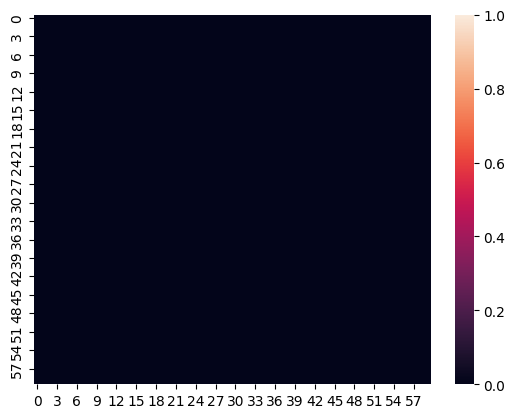

In [66]:
sns.heatmap(data[0], vmin = 0, vmax = 1, cbar=True)

<Axes: >

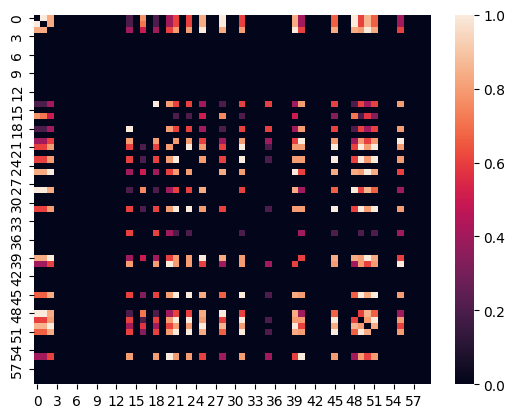

In [34]:
sns.heatmap(data[200], vmin = 0, vmax = 1, cbar=True)

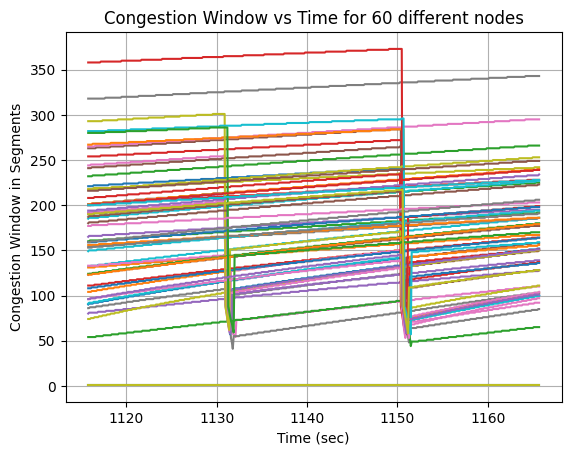

In [18]:
# filename = "dumbbell-8.cwnd"
os.chdir("tcp-dumbbell")

t = np.array([0.0])
v = np.array([0])
ep = 0.1
for f in os.listdir():
    if(f.endswith('.cwnd')):
        d = np.genfromtxt(f, delimiter=8).reshape(-1, 2)
        # print()
        plt.plot(d[11000:11500, 0], d[11000:11500, 1], label=f"{f}")
plt.xlabel("Time (sec)")
plt.ylabel("Congestion Window in Segments")
plt.title("Congestion Window vs Time for 60 different nodes")
plt.grid()
# plt.legend()

### metric 2: single flow

In [19]:
# two arrays determining loss events
s_d2 = np.zeros(len(data_d2))
s_d3 = np.zeros(len(data_d2))

total = sz-1
# window length = sampling interval * tau = 0.1 s * 50 = 5 s
tau = 50
# s_ij = max(n_ij/n_i, n_ji/n_j)

# sliding window
for i in range(tau, total-tau):
    ni = 0
    nj = 0
    T = 0
    for j in range(i-tau, i+tau):
        if(loss_d2[j] == 0 and loss_d3[j] == 0):
            continue
        if(loss_d2[j] == 1 and loss_d3[j] == 1):
            ni += 1
            nj += 1
            T += 1
        elif(loss_d2[j] == 1 and loss_d3[j] != 1):
            ni += 1
            T += 1
        elif(loss_d3[j] == 1 and loss_d2[j] != 1):
            nj += 1
            T += 1

    if(T != 0):
        s_d2[i] = ni/T
        s_d3[i] = nj/T

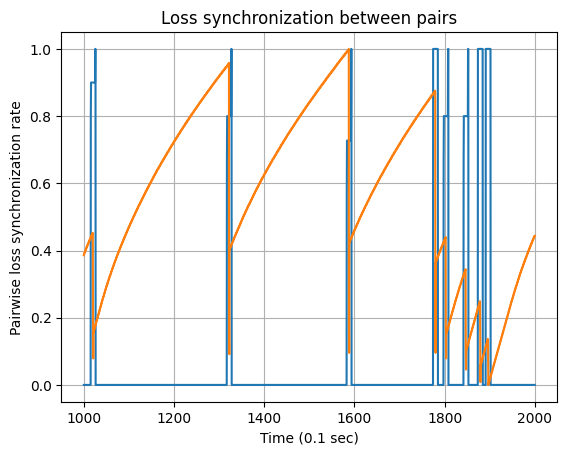

In [20]:
t = np.arange(sz)*0.1 + 1000
plt.plot(t, s_d2)
plt.plot(t, data_d2_val)
plt.xlabel("Time (0.1 sec)")
plt.ylabel("Pairwise loss synchronization rate")
plt.title("Loss synchronization between pairs")
plt.grid()

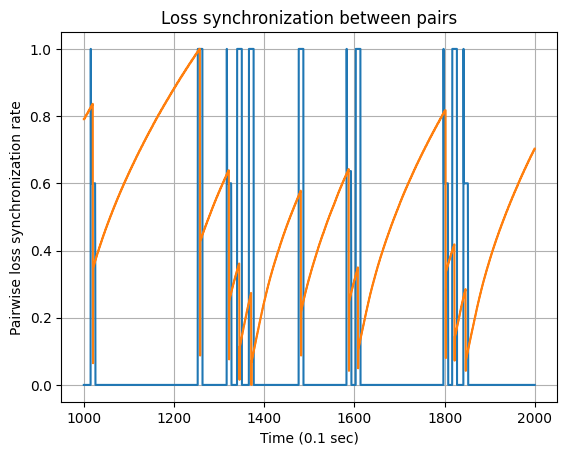

In [21]:
t = np.arange(sz)*0.1 + 1000
plt.plot(t, s_d3)
plt.plot(t, data_d3_val)
plt.xlabel("Time (0.1 sec)")
plt.ylabel("Pairwise loss synchronization rate")
plt.title("Loss synchronization between pairs")
plt.grid()

## metric 3: global sync

In [22]:
# os.chdir("tcp-dumbbell")

cwnd_arr = []
for f in os.listdir():
    if(f.endswith('.cwnd')):
        d = np.genfromtxt(f, delimiter=8).reshape(-1, 2)
        cwnd_arr.append(d[9843:, 1])

cwnd_arr = np.array(cwnd_arr)
cwnd_arr

array([[  1.,   1.,   1., ...,   1.,   1.,   1.],
       [ 77.,  77.,  77., ...,  58.,  51.,  66.],
       [ 68.,  68.,  68., ..., 316., 316., 316.],
       ...,
       [233., 233., 233., ..., 177., 177., 177.],
       [136., 136., 136., ..., 244., 244., 244.],
       [109., 109., 110., ..., 179., 179., 179.]], shape=(60, 10000))

In [23]:
# change into loss events
loss_events_arr = []
for i in range(60):
    ta = [0]
    for j in range(1, len(cwnd_arr[i])):
        if(cwnd_arr[i, j] < cwnd_arr[i, j-1]):
            ta.append(1)
        else:
            ta.append(0)
    loss_events_arr.append(ta)
loss_events_arr = np.array(loss_events_arr)
loss_events_arr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(60, 10000))

In [24]:
# two arrays determining loss events
g = np.zeros(10000)

total = 10000
# window length = sampling interval * tau
tau = 25
# s_ij = max(n_ij/n_i, n_ji/n_j)

# sliding window
for i in range(tau, total-tau):
    l = np.zeros(2*tau)
    m = np.zeros(2*tau)
    for tl in range(i-tau, i+tau):
        for ll in range(60):
            if(loss_events_arr[ll, tl] == 1):
                l[tl-i+tau] = 1
                m[tl-i+tau] += 1
    for ll in range(tau):
        if(l[ll] == 1):
            g[i] = max(g[i], m[ll]/max(m))

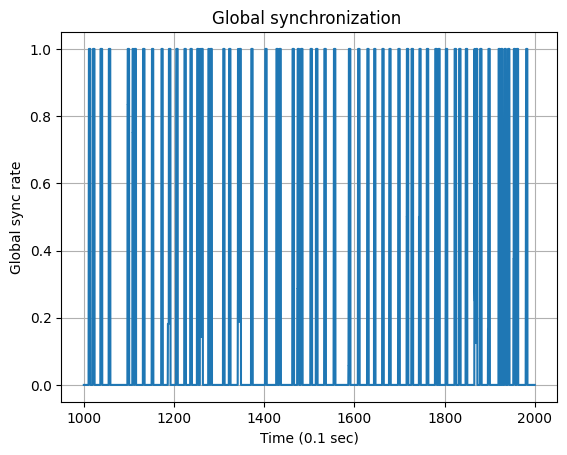

In [25]:
t = np.arange(sz)*0.1 + 1000
plt.plot(t, g)
plt.xlabel("Time (0.1 sec)")
plt.ylabel("Global sync rate")
plt.title("Global synchronization ")
plt.grid()

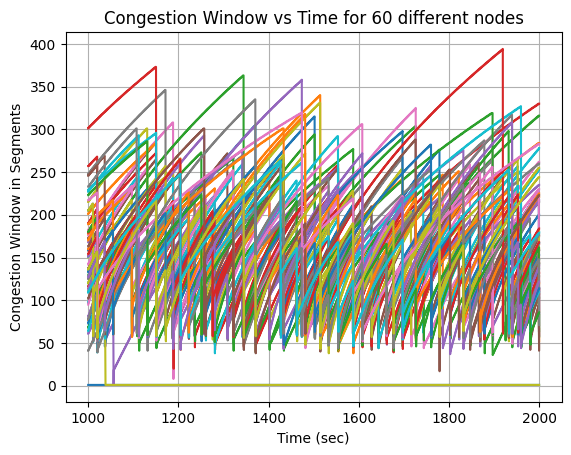

In [26]:
t = np.array([0.0])
v = np.array([0])
ep = 0.1
for f in os.listdir():
    if(f.endswith('.cwnd')):
        d = np.genfromtxt(f, delimiter=8).reshape(-1, 2)
        # print()
        plt.plot(d[9843:, 0], d[9843:, 1], label=f"{f}")
plt.xlabel("Time (sec)")
plt.ylabel("Congestion Window in Segments")
plt.title("Congestion Window vs Time for 60 different nodes")
plt.grid()
# plt.legend()

/tmp/ipykernel_4083/3380048368.py:7: RuntimeWarning: invalid value encountered in divide
  v = (v - np.min(v))/(np.max(v) - np.min(v))


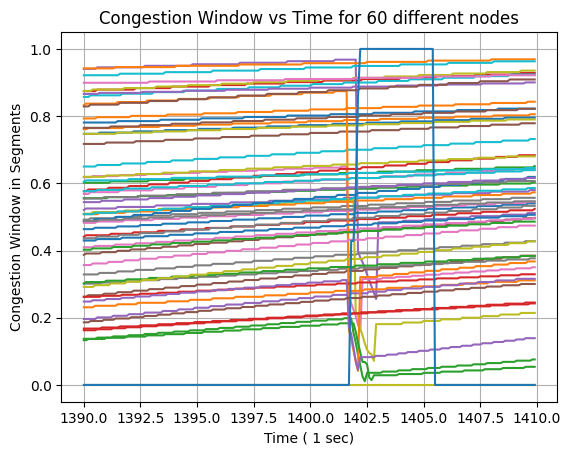

In [27]:
t = np.arange(10000)*0.1 + 1000
for f in os.listdir():
    if(f.endswith('.cwnd')):
        d = np.genfromtxt(f, delimiter=8).reshape(-1, 2)
        # print()
        v = d[9843:, 1]
        v = (v - np.min(v))/(np.max(v) - np.min(v))
        plt.plot(t[3900:4100], v[3900:4100], label=f"{f}")

plt.plot(t[3900:4100], g[3900:4100])
plt.xlabel("Time ( 1 sec)")
plt.ylabel("Congestion Window in Segments")
plt.title("Congestion Window vs Time for 60 different nodes")
plt.grid()
# plt.legend()

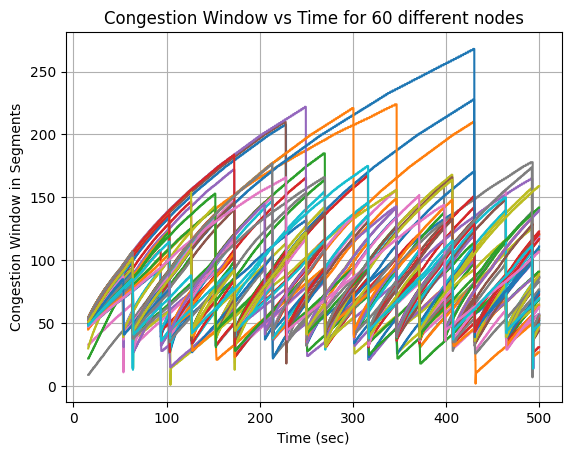

In [4]:

os.chdir('/home/jack/github/mtp/pythonWork/tcp-dumbbell-regular-it3//')

for f in os.listdir():
    if(f.endswith('.cwnd')):
        d = np.genfromtxt(f, delimiter=8).reshape(-1, 2)
        # print()
        plt.plot(d[:, 0], d[:, 1], label=f"{f}")
plt.xlabel("Time (sec)")
plt.ylabel("Congestion Window in Segments")
plt.title("Congestion Window vs Time for 60 different nodes")
plt.grid()
# plt.legend()